In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")
from statsmodels.formula.api import ols

from math import exp
from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
df = pd.read_csv("states_all.csv")

In [54]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [55]:
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [71]:
df.head(100)
df.iloc[200:220]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
200,1995_WASHINGTON,WASHINGTON,1995,938314.0,5985425.0,345792.0,4091373.0,1548260.0,6200754.0,3078586.0,1833862.0,265076.0,785601.0,5984.0,73581.0,75186.0,75052.0,59612.0,600444.0,276563.0,882991.0,NaN,NaN,NaN,NaN
201,1995_WEST_VIRGINIA,WEST_VIRGINIA,1995,310231.0,1916605.0,155738.0,1210730.0,550137.0,1925100.0,1104307.0,540560.0,128462.0,134365.0,3499.0,22577.0,22178.0,25089.0,21844.0,183567.0,94926.0,281992.0,NaN,NaN,NaN,NaN
202,1995_WISCONSIN,WISCONSIN,1995,865374.0,6006745.0,248319.0,2621263.0,3137163.0,6056854.0,3425341.0,1767790.0,204052.0,426714.0,18045.0,62859.0,65427.0,65788.0,57791.0,522060.0,267211.0,807316.0,NaN,NaN,NaN,NaN
203,1995_WYOMING,WYOMING,1995,100314.0,634237.0,42456.0,303913.0,287868.0,642935.0,357039.0,198669.0,21975.0,48915.0,NaN,7135.0,7577.0,8302.0,6679.0,61796.0,30928.0,NaN,NaN,NaN,NaN,NaN
204,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
205,1996_ALASKA,ALASKA,1996,126189.0,1120346.0,123505.0,706116.0,290725.0,1240031.0,636959.0,365085.0,38996.0,179297.0,2186.0,10451.0,10055.0,9627.0,7370.0,81725.0,35557.0,119468.0,223.833455,277.643071,NaN,262.100424
206,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
207,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
209,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,12520.0,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [57]:
df.shape

(1492, 25)

In [58]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,1.280000e+03,1319.000000,1360.000000,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,9.027693e+05,17601.614102,63746.761029,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,1.327562e+06,30016.166447,80205.138143,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,1.815645e+05,2021.000000,11745.000000,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,5.102595e+05,8106.000000,41597.500000,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,9.668515e+05,22295.000000,73865.250000,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [59]:
# Clean:

# Rows:
#     AVG_MATH_4_SCORE Nan
#     States (Samoa, DoD, etc)
#     Years: 2017 missing data?
        
# Columns:
#     Enroll
#     Other_expend
#     8_score

In [60]:
# Find the Percentage of rows missing data
df.isna().mean()
df.groupby('STATE')['AVG_MATH_4_SCORE'].count()
# df.dropna(subset=['gross'], inplace=True)

STATE
ALABAMA                                     11
ALASKA                                       9
AMERICAN_SAMOA                               0
ARIZONA                                     11
ARKANSAS                                    11
AS                                           0
BI                                           0
BIE                                          0
BUREAU_OF_INDIAN_AFFAIRS                     0
BUREAU_OF_INDIAN_EDUCATIO                    0
BUREAU_OF_INDIAN_EDUCATION                   0
CALIFORNIA                                  11
COLORADO                                    10
COMMONWEALTH_OF_MARIANAS                     0
CONNECTICUT                                 11
DD                                           0
DELAWARE                                    10
DEPARTMENT_OF_DEFENSE                        0
DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY     0
DISTRICT_OF_COLUMBIA                        12
DOD                                          0
DOD_(OV

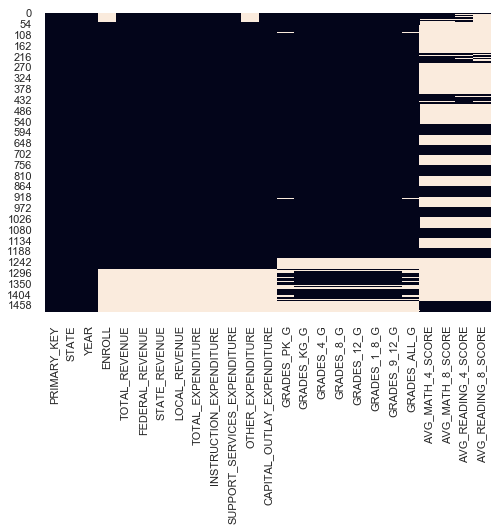

In [61]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

In [25]:
df[1200:1350]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1200,2015_MICHIGAN,MICHIGAN,2015,1345009.0,19025996.0,1582706.0,10510346.0,6932944.0,17742903.0,9040821.0,5839572.0,831874.0,967476.0,48961.0,113090.0,111267.0,113640.0,114700.0,887682.0,482540.0,1419183.0,235.728894,278.168652,216.306630,267.905530
1201,2015_MINNESOTA,MINNESOTA,2015,807044.0,11684249.0,629909.0,7567199.0,3487141.0,11969872.0,6257807.0,2933999.0,893322.0,1328863.0,15443.0,63591.0,65362.0,63075.0,69441.0,519641.0,265709.0,800793.0,249.575847,294.147778,223.352920,274.497568
1202,2015_MISSISSIPPI,MISSISSIPPI,2015,490189.0,4592343.0,672366.0,2324855.0,1595122.0,4624539.0,2350872.0,1525340.0,285117.0,407791.0,4867.0,37573.0,36092.0,35922.0,29561.0,301491.0,135375.0,441733.0,234.243053,270.580479,214.110687,264.496755
1203,2015_MISSOURI,MISSOURI,2015,892779.0,10623391.0,948600.0,4441091.0,5233700.0,10540353.0,5387766.0,3266781.0,615166.0,869078.0,33360.0,67126.0,69134.0,67126.0,64475.0,549399.0,269349.0,852108.0,238.964923,280.821426,222.725517,270.236818
1204,2015_MONTANA,MONTANA,2015,144447.0,1804339.0,214980.0,851068.0,738291.0,1804841.0,940488.0,581694.0,80426.0,160885.0,1158.0,11502.0,11659.0,10967.0,9756.0,90837.0,41822.0,133817.0,241.287048,287.464006,224.757394,251.976165
1205,2015_NEBRASKA,NEBRASKA,2015,312281.0,4248695.0,344382.0,1350116.0,2554197.0,4283846.0,2446701.0,1102622.0,183067.0,449287.0,15665.0,23374.0,23366.0,22656.0,23549.0,185325.0,91650.0,292640.0,243.863667,286.498563,226.634611,266.876352
1206,2015_NEVADA,NEVADA,2015,438948.0,4345419.0,395630.0,2744606.0,1205183.0,4183085.0,2170424.0,1459504.0,174388.0,205794.0,5554.0,34495.0,36474.0,35802.0,32122.0,289732.0,136906.0,432192.0,233.827016,275.171869,214.425584,269.956778
1207,2015_NEW_HAMPSHIRE,NEW_HAMPSHIRE,2015,183039.0,3093061.0,164905.0,1000063.0,1928093.0,3044720.0,1697165.0,938368.0,75581.0,125475.0,3743.0,11192.0,13639.0,14319.0,13947.0,109370.0,58107.0,171220.0,249.150621,294.413019,231.949848,269.426211
1208,2015_NEW_JERSEY,NEW_JERSEY,2015,1339230.0,29335237.0,1154004.0,11423305.0,16757928.0,28809725.0,15339450.0,9414336.0,1271558.0,1290946.0,63284.0,91870.0,98565.0,98128.0,97602.0,790025.0,402208.0,1255517.0,245.383220,293.365938,229.487674,259.417376
1209,2015_NEW_MEXICO,NEW_MEXICO,2015,326297.0,3789651.0,499789.0,2595682.0,694180.0,3846641.0,1773801.0,1256303.0,154435.0,587243.0,8509.0,24696.0,25681.0,24957.0,21106.0,205691.0,96798.0,310998.0,231.167236,270.897534,207.240446,274.806746


In [70]:
df[df['YEAR'] == 1992]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [ ]:
# How many states have AVG_MATH_4_SCORE?
# How many years?

